# * 네이버 주식 데이터 가져와서 분석하기

In [ ]:
import pickle

with open("finance_discussion_064350_text.pk", 'rb') as f:
    finance_discussion_text = pickle.load(f)

In [ ]:
type(finance_discussion_text)

In [ ]:
from tqdm import tqdm_notebook

finance_discussion_data = ''

for n in tqdm_notebook(range(0, len(finance_discussion_text))):
#for each_article in finance_discussion_data:
    #print(type(each_article))
    each_article = finance_discussion_text[n]
    if len(each_article) != 0:
        if each_article != None:
            for each_line in each_article:
                if each_line != None:
                    if len(each_line) != 0:
                        finance_discussion_data = finance_discussion_data + each_line
                else:
                    print("$", end=" ")

#news_count = sum[len(i) for i in finance_news_data]
#print(news_count)

In [ ]:
import string

refined_finance_discussion_data = finance_discussion_data.replace(string.punctuation, ' ')
refined_finance_discussion_data = refined_finance_discussion_data.replace('\r', '')

if '\r' in refined_finance_discussion_data:
    print("True")

In [ ]:
print(refined_finance_discussion_data[1000:1050])
print(len(refined_finance_discussion_data))
print(type(refined_finance_discussion_data))

In [ ]:
with open("finance_discussion_064350_refined_text.pk", 'wb') as f:
    #refined_finance_discussion_data = pickle.load(f)
    pickle.dump(refined_finance_discussion_data, f)

In [ ]:
import pickle

with open("finance_discussion_064350_refined_text.pk", 'rb') as f:
    refined_finance_discussion_data = pickle.load(f)

In [ ]:
from konlpy.tag import Okt
#mecab = Mecab()
okt = Okt()
#500만-1000만 : Fault
#500만-750만 : ok
#750만-1000만 : ok
total_tokens = []

# tokens_ko1 = mecab.nouns(refined_finance_discussion_text[:2500000])
# tokens_ko2 = mecab.nouns(refined_finance_discussion_text[2500000:5000000])
# tokens_ko3 = mecab.nouns(refined_finance_discussion_text[5000000:7500000])
# tokens_ko4 = mecab.nouns(refined_finance_discussion_text[7500000:10000000])
# tokens_ko5 = mecab.nouns(refined_finance_discussion_text[10000000:])

total_tokens = okt.nouns(refined_finance_discussion_data)

#total_tokens = tokens_ko1 + tokens_ko2 + tokens_ko3 + tokens_ko4 + tokens_ko5
#tokens_ko = mecab.pos(finance_discussion_text)
total_tokens[:100]

In [ ]:
with open("finance_discussion_064350_tokens_ko.pk", 'wb') as f:
    pickle.dump(total_tokens, f)

In [15]:
import pickle
import nltk
import platform
import sys
import matplotlib.pyplot as plt
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

with open("finance_discussion_064350_tokens_ko.pk", 'rb') as f:
    total_tokens = pickle.load(f)

In [6]:
ko = nltk.Text(total_tokens, name='LG전자')
print(len(ko.tokens))
print(len(set(ko.tokens)))

2405402
41135


In [7]:
ko = nltk.Text(total_tokens, name='LG전자')
ko.vocab().most_common(10)

[('것', 37763),
 ('공감', 29859),
 ('북한', 29160),
 ('일', 22127),
 ('회담', 20312),
 ('거', 20095),
 ('수', 17208),
 ('미국', 15874),
 ('철도', 15837),
 ('원', 14046)]

In [18]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지',
                      "'", '"', '(', ')', '%', '&', '-', '[', ']', '▶', '…', '·', 'ⓒ', ';', '거', '것']

total_token = [each_word for each_word in total_tokens if each_word not in stop_words]

ko = nltk.Text(total_token, name='현대로템')
ko.vocab().most_common(10)

[('공감', 29859),
 ('북한', 29160),
 ('회담', 20312),
 ('미국', 15874),
 ('철도', 15837),
 ('원', 14046),
 ('트럼프', 13927),
 ('말', 13008),
 ('남북', 12937),
 ('대통령', 11673)]

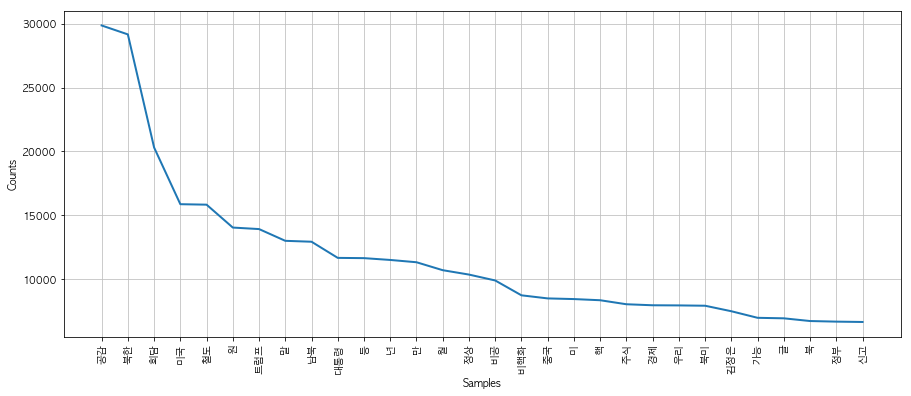

In [17]:
plt.figure(figsize=(15,6))
ko.plot(30)
plt.show()

In [12]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

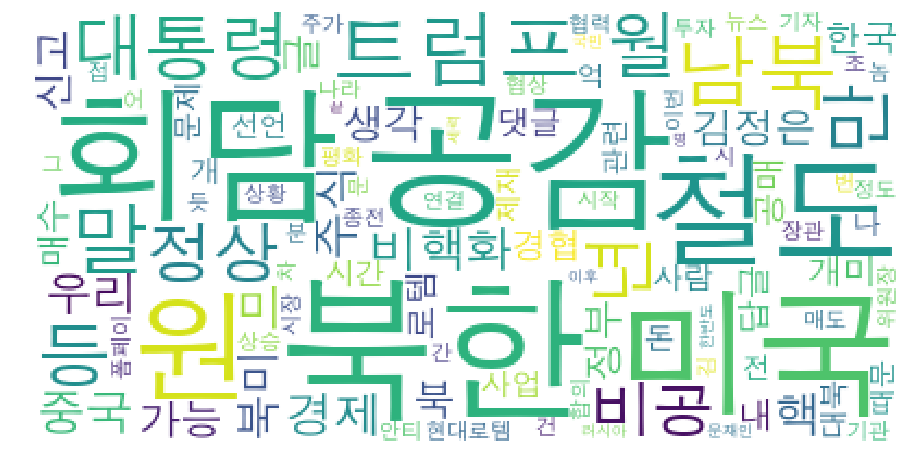

In [13]:
data = ko.vocab().most_common(100)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

* gensim install : **pip install gensim**

In [ ]:
import gensim
from gensim.models import word2vec

In [ ]:
finance_discussion_corpus = []

for n in tqdm_notebook(range(0, len(finance_discussion_text))):
#for each_article in finance_discussion_data:
    #print(type(each_article))
    each_article = finance_discussion_text[n]
    temp = ''
    if len(each_article) != 0:
        if each_article != None:
            for each_line in each_article:
                if each_line != None:
                    if len(each_line) != 0:
                        temp = temp + each_line
                        finance_discussion_corpus.append(temp)
                else:
                    print("$", end=" ")

In [ ]:
with open("finance_discussion_064350_corpus_w2v.pk", 'wb') as f:
    pickle.dump(finance_discussion_corpus, f)

In [ ]:
with open("finance_discussion_064350_corpus_w2v.pk", 'rb') as f:
    finance_discussion_corpus = pickle.load(f)

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

token_corpus = []

for n in tqdm_notebook(range(len(finance_discussion_corpus))):
    token_text = mecab.nouns(finance_discussion_corpus[n])
    token_corpus.append(token_text)
    
token_corpus[:5]

In [ ]:
with open("finance_discussion_064350_tokenizied_corpus_w2v.pk", 'wb') as f:
    pickle.dump(token_corpus, f)

In [ ]:
#data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(token_corpus, size=200, window=5, min_count=5, negative=5, sg=1)
model.save('finance_data_064350.model')

In [ ]:
if not model:
    model = word2vec.Word2Vec.load("finance_data_064350.model")

model

In [ ]:
model.wv.most_similar(positive=['투자'])

In [ ]:
model.wv.similar_by_word('주식')